In [1]:
from emiss_profiles import checkerboard_profile
import numpy as np
import os
from mcnsh import mcnormspatialhet
from nsh import normalizedspatialhet
import matplotlib.pyplot as plt

In [6]:
def writeCheckerboardArray(fx, fy, xgrid, ygrid, zgrid, phase_shift=False):
    cwd = os.getcwd()
    subdir = 'sh-patterns'
    griddir = f'xres{xgrid}yres{ygrid}'

    if (fx != 0.5) and (fy != 0.5):
        filename = f'fx{fx}fy{fy}.csv'
    else:
        filename = 'uniform-basecase.csv'
    
    max_val=1
    min_val=0
    arr = checkerboard_profile(fx, fy, xgrid, ygrid, zgrid, max_val, min_val, 
                               phase_shift=phase_shift)
    
    pattern_path = os.path.join(cwd, subdir, griddir)
    if not os.path.exists(pattern_path):
        os.makedirs(pattern_path)

    array_path = os.path.join(pattern_path, filename)
    
    np.savetxt(array_path, arr.data[0][0], delimiter=',')
    return array_path

def writeRoadArray(width):
    # create road scenario (single strip vertically through center of domain)
    cwd = os.getcwd()
    subdir = 'sh-patterns'
    griddir = f'xres{xgrid}yres{ygrid}'

    filename = f'road-{width}x.csv'

    max_val=1
    min_val=0
    arr = np.zeros((xgrid, ygrid))
    x_midpt = int(0.5*xgrid)

    if width == 1:
        arr[x_midpt:x_midpt+1, :] = 1
    else:
        half_width = int(0.5*width)
        arr[x_midpt-half_width:x_midpt+half_width, :] = 1

    pattern_path = os.path.join(cwd, subdir, griddir)
    if not os.path.exists(pattern_path):
        os.makedirs(pattern_path)

    array_path = os.path.join(pattern_path, filename)
    np.savetxt(array_path, arr, delimiter=',')
    return array_path

def writePointSourceArray(width):
    # create road scenario (single strip vertically through center of domain)
    cwd = os.getcwd()
    subdir = 'sh-patterns'
    griddir = f'xres{xgrid}yres{ygrid}'

    filename = f'point-source-{width}x{width}.csv'

    max_val=1
    min_val=0
    arr = np.zeros((xgrid, ygrid))
    x_midpt = int(0.5*xgrid)
    y_midpt = int(0.5*ygrid)

    if width == 1:
        arr[x_midpt:x_midpt+1, y_midpt:y_midpt+1] = 1
    else:
        half_width = int(0.5*width)
        arr[x_midpt-half_width:x_midpt+half_width, y_midpt-half_width:y_midpt+half_width] = 1

    pattern_path = os.path.join(cwd, subdir, griddir)
    if not os.path.exists(pattern_path):
        os.makedirs(pattern_path)

    array_path = os.path.join(pattern_path, filename)
    np.savetxt(array_path, arr, delimiter=',')
    return array_path



In [7]:
xgrid = 100
ygrid = 100
zgrid = 1

# create basecase (uniform emissions)
fx = 0.5
fy = 0.5
array_path = writeCheckerboardArray(fx, fy, xgrid, ygrid, zgrid)

# create checkerboard arrays for fx 0-2 and fy 0-2
for fx in np.arange(3):
    for fy in np.arange(3):
        array_path = writeCheckerboardArray(fx, fy, xgrid, ygrid, zgrid)

for width in [1, 2, 4, 8, 10]:
    writeRoadArray(width)

for width in [1, 2, 4, 8, 10, 16]:
    writePointSourceArray(width)

In [11]:
my_data = np.genfromtxt(array_path, delimiter=',')

([<matplotlib.axis.YTick at 0x2b032eca35e0>,
 [Text(0, 0, ''),
  Text(0, 1, ''),
  Text(0, 2, ''),
  Text(0, 3, ''),
  Text(0, 4, ''),
  Text(0, 5, ''),
  Text(0, 6, ''),
  Text(0, 7, ''),
  Text(0, 8, ''),
  Text(0, 9, ''),
  Text(0, 10, ''),
  Text(0, 11, ''),
  Text(0, 12, ''),
  Text(0, 13, ''),
  Text(0, 14, ''),
  Text(0, 15, ''),
  Text(0, 16, ''),
  Text(0, 17, ''),
  Text(0, 18, ''),
  Text(0, 19, ''),
  Text(0, 20, ''),
  Text(0, 21, ''),
  Text(0, 22, ''),
  Text(0, 23, ''),
  Text(0, 24, ''),
  Text(0, 25, ''),
  Text(0, 26, ''),
  Text(0, 27, ''),
  Text(0, 28, ''),
  Text(0, 29, ''),
  Text(0, 30, ''),
  Text(0, 31, ''),
  Text(0, 32, ''),
  Text(0, 33, ''),
  Text(0, 34, ''),
  Text(0, 35, ''),
  Text(0, 36, ''),
  Text(0, 37, ''),
  Text(0, 38, ''),
  Text(0, 39, ''),
  Text(0, 40, ''),
  Text(0, 41, ''),
  Text(0, 42, ''),
  Text(0, 43, ''),
  Text(0, 44, ''),
  Text(0, 45, ''),
  Text(0, 46, ''),
  Text(0, 47, ''),
  Text(0, 48, ''),
  Text(0, 49, ''),
  Text(0, 50, '

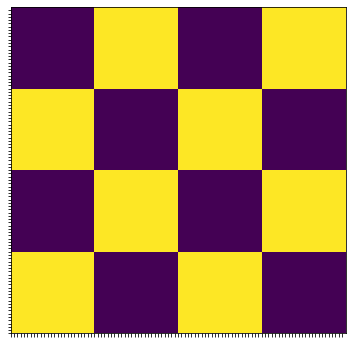

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
plt.pcolormesh(my_data)
plt.xticks(np.arange(xgrid), "")
plt.yticks(np.arange(ygrid), "")
#plt.grid()